In [1]:
import pandas as pd


df = pd.read_excel('/content/Full production data.xlsx')


print('First 5 rows of the DataFrame:')
print(df.head())
print('\n')


print('DataFrame Info:')
df.info()
print('\n')


print('Descriptive Statistics:')
print(df.describe(include='all'))

First 5 rows of the DataFrame:
        Area          Item  Year  Production   Yield  Area_Harvested  \
0  Australia  Maize (corn)  2015   494589.00  8300.1           59588   
1  Australia  Maize (corn)  2016   400032.00  7508.0           53281   
2  Australia  Maize (corn)  2017   436193.91  6436.3           67771   
3  Australia  Maize (corn)  2018   387240.00  7336.5           52783   
4  Australia  Maize (corn)  2019   327206.19  5550.7           58949   

   Yield_Carcass  Gross_Production_Index  Per_Capita_Production_Index  \
0              0                   115.5                        115.5   
1              0                    93.4                         92.0   
2              0                   101.8                         98.7   
3              0                    90.4                         86.2   
4              0                    76.4                         71.8   

   Gross_Production_Value_USD  Food_Quantity  Food_kcal_per_capita_day  \
0                      

In [2]:
print('Unique Areas:', df['Area'].unique())
print('Unique Items:', df['Item'].unique())
print('Year Range:', df['Year'].min(), '-', df['Year'].max())

Unique Areas: ['Australia' 'Brazil' 'France' 'India' 'Nigeria']
Unique Items: ['Maize (corn)' 'Raw milk of cattle' 'Rice' 'Wheat']
Year Range: 2015 - 2024


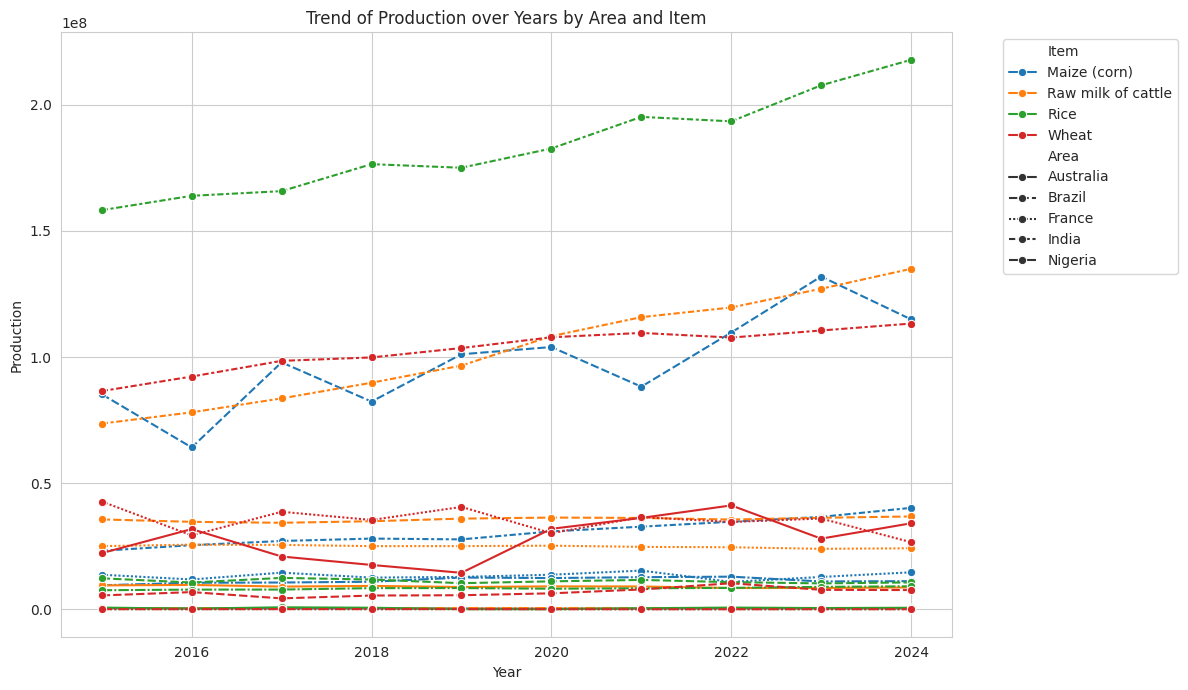

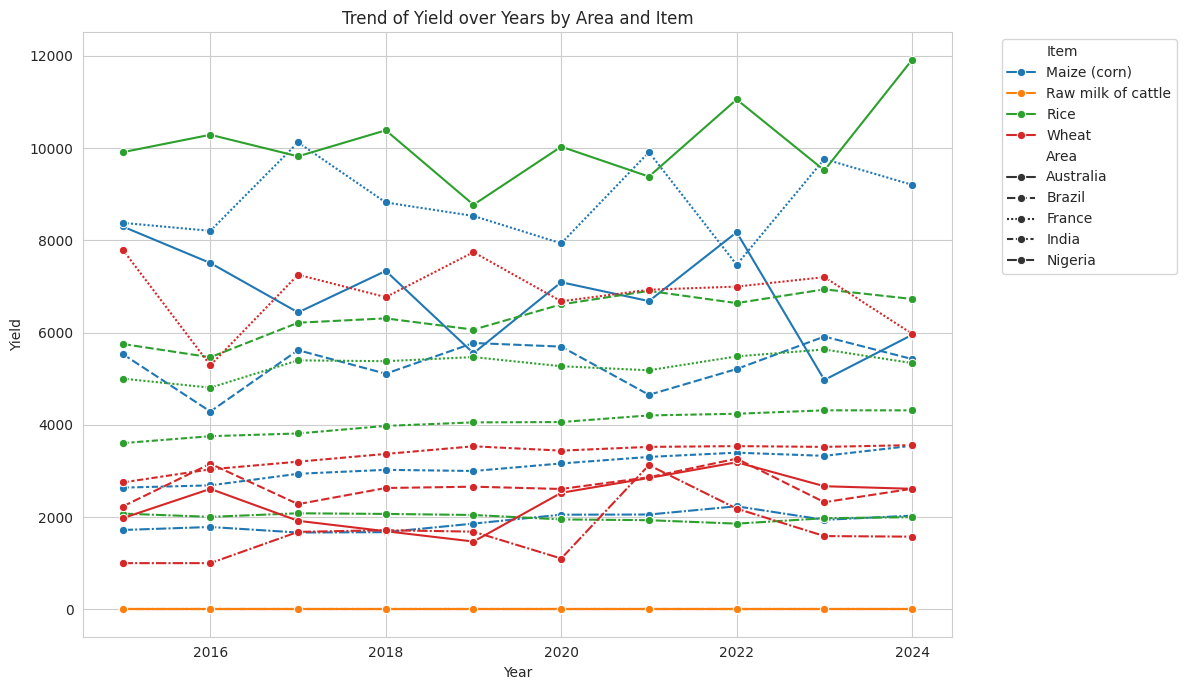

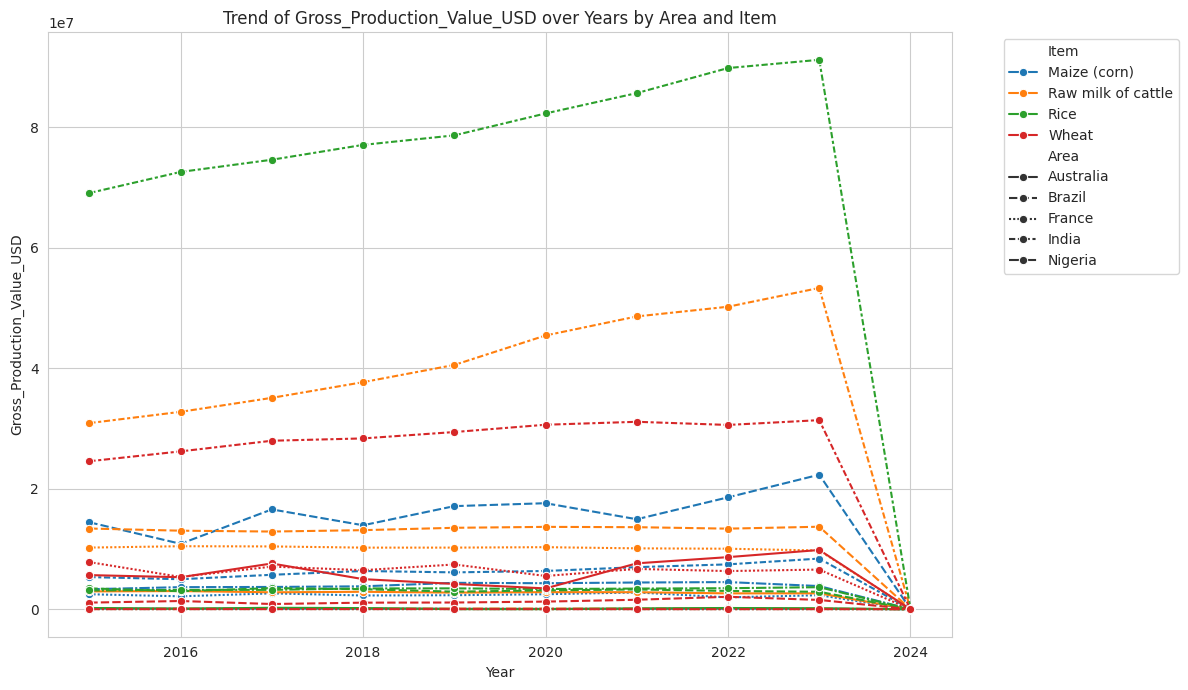

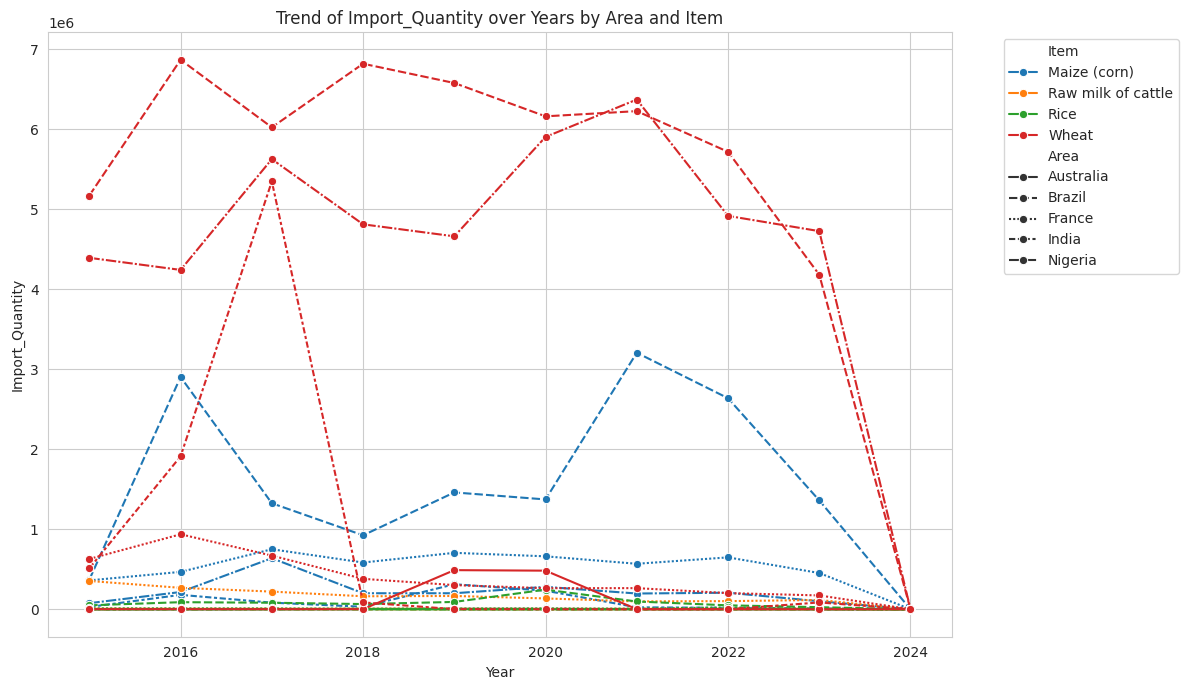

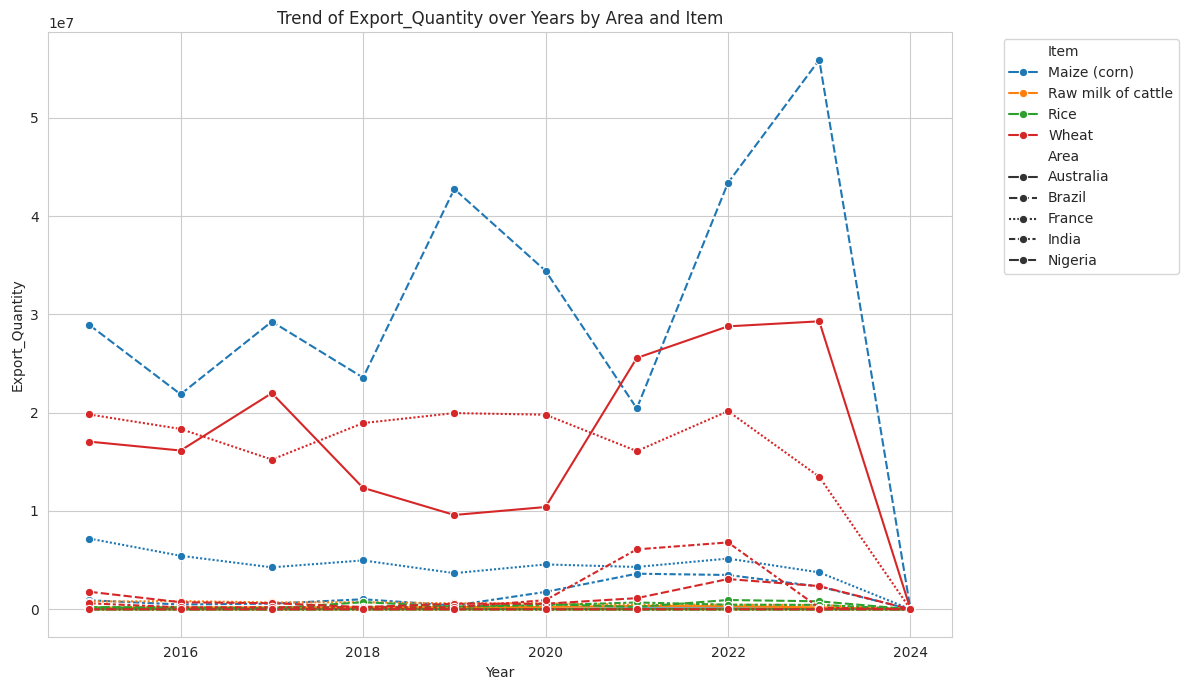

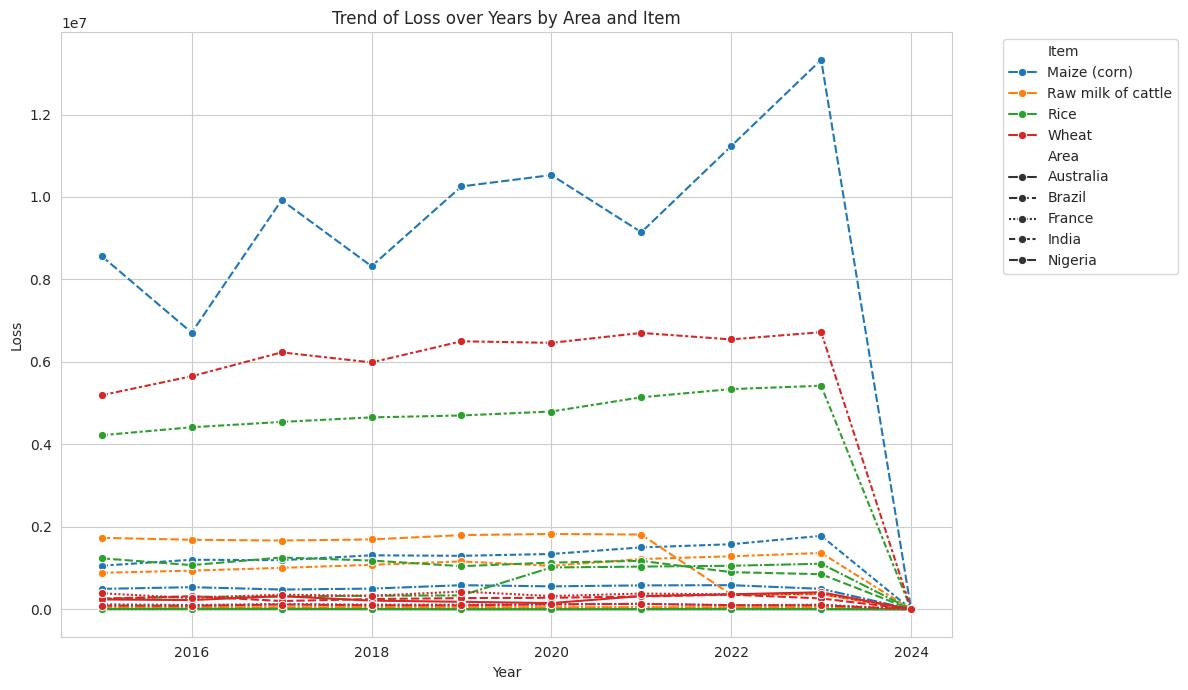

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['Production', 'Yield', 'Gross_Production_Value_USD', 'Import_Quantity', 'Export_Quantity', 'Loss']


sns.set_style('whitegrid')


for col in numerical_cols:
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df, x='Year', y=col, hue='Item', style='Area', marker='o', errorbar=None)
    plt.title(f'Trend of {col} over Years by Area and Item')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

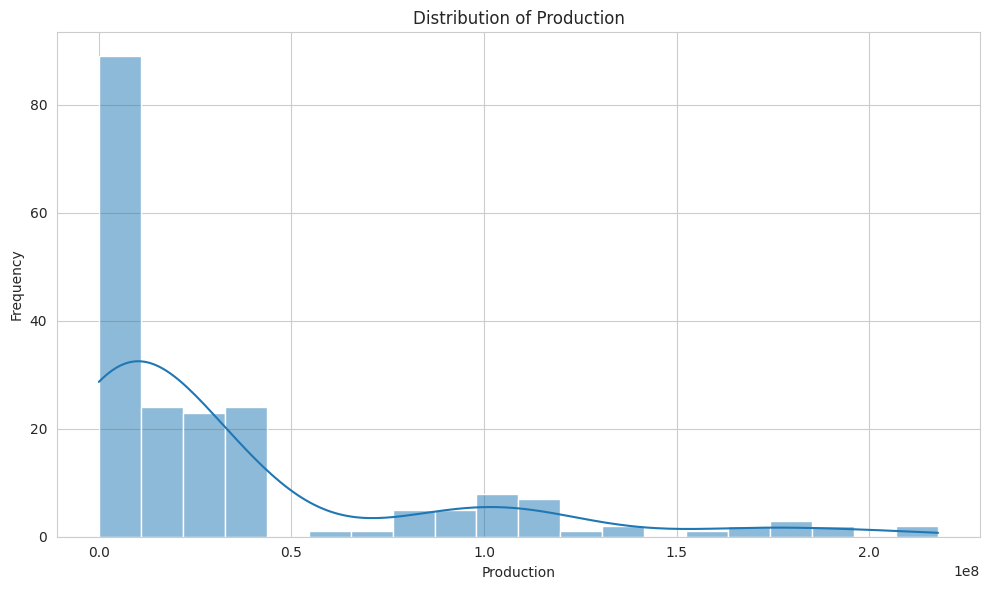

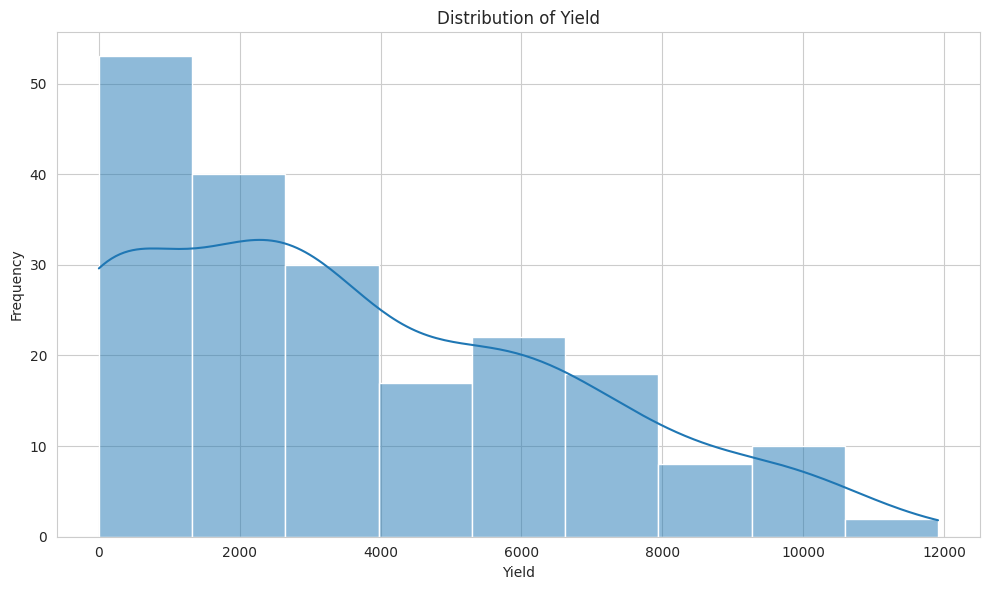

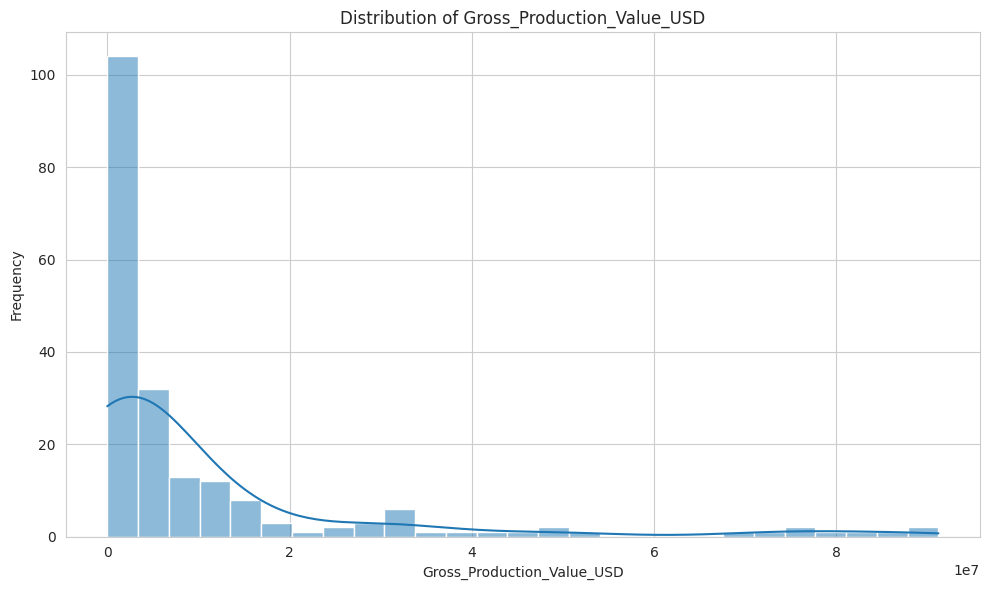

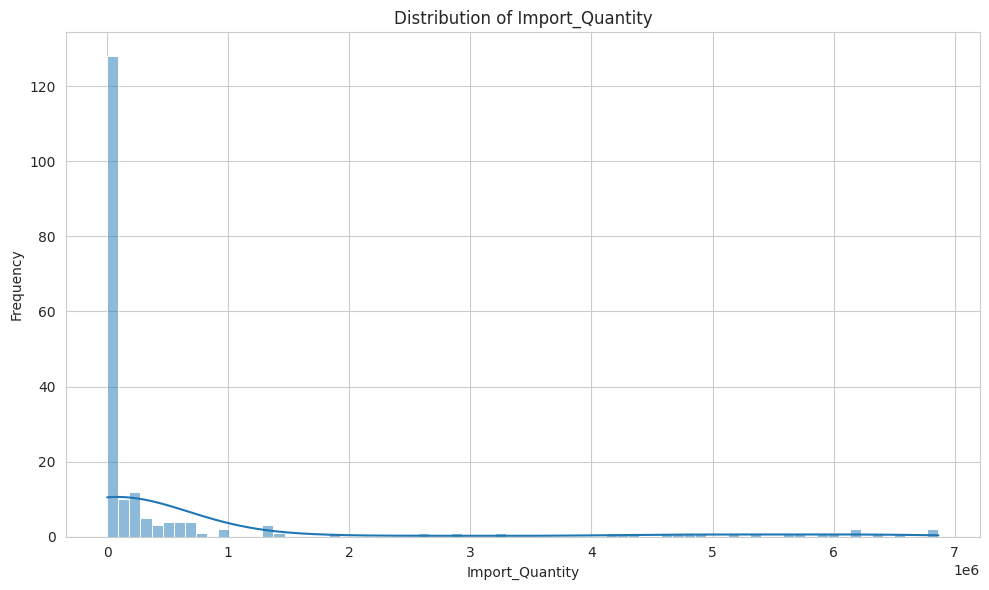

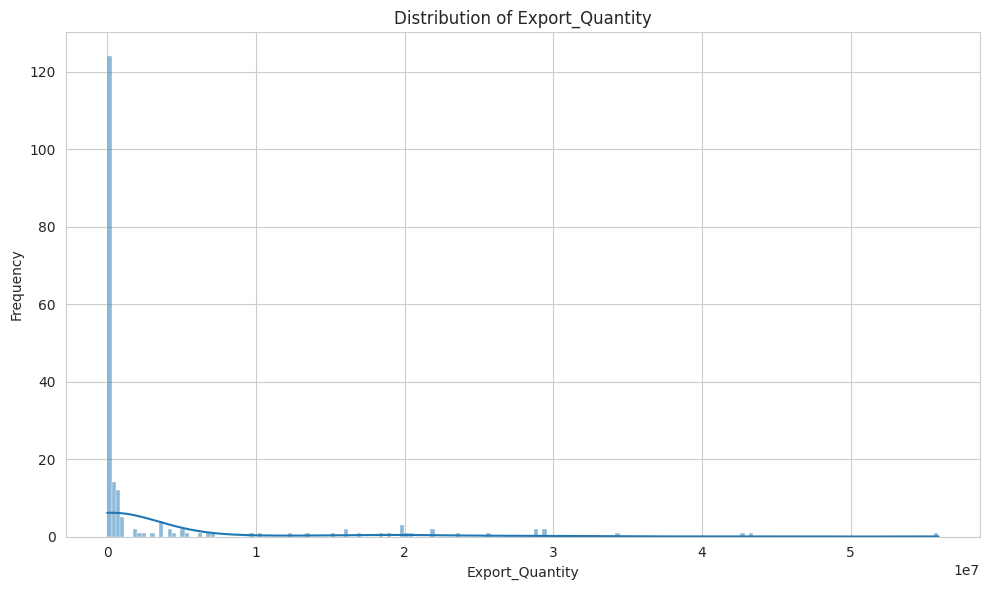

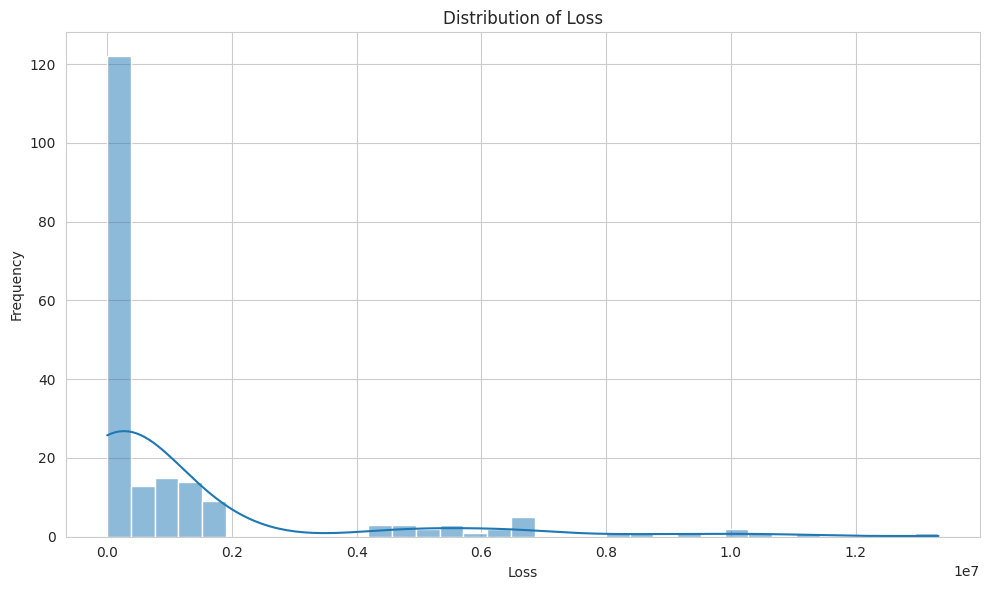

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['Production', 'Yield', 'Gross_Production_Value_USD', 'Import_Quantity', 'Export_Quantity', 'Loss']

sns.set_style('whitegrid')


for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

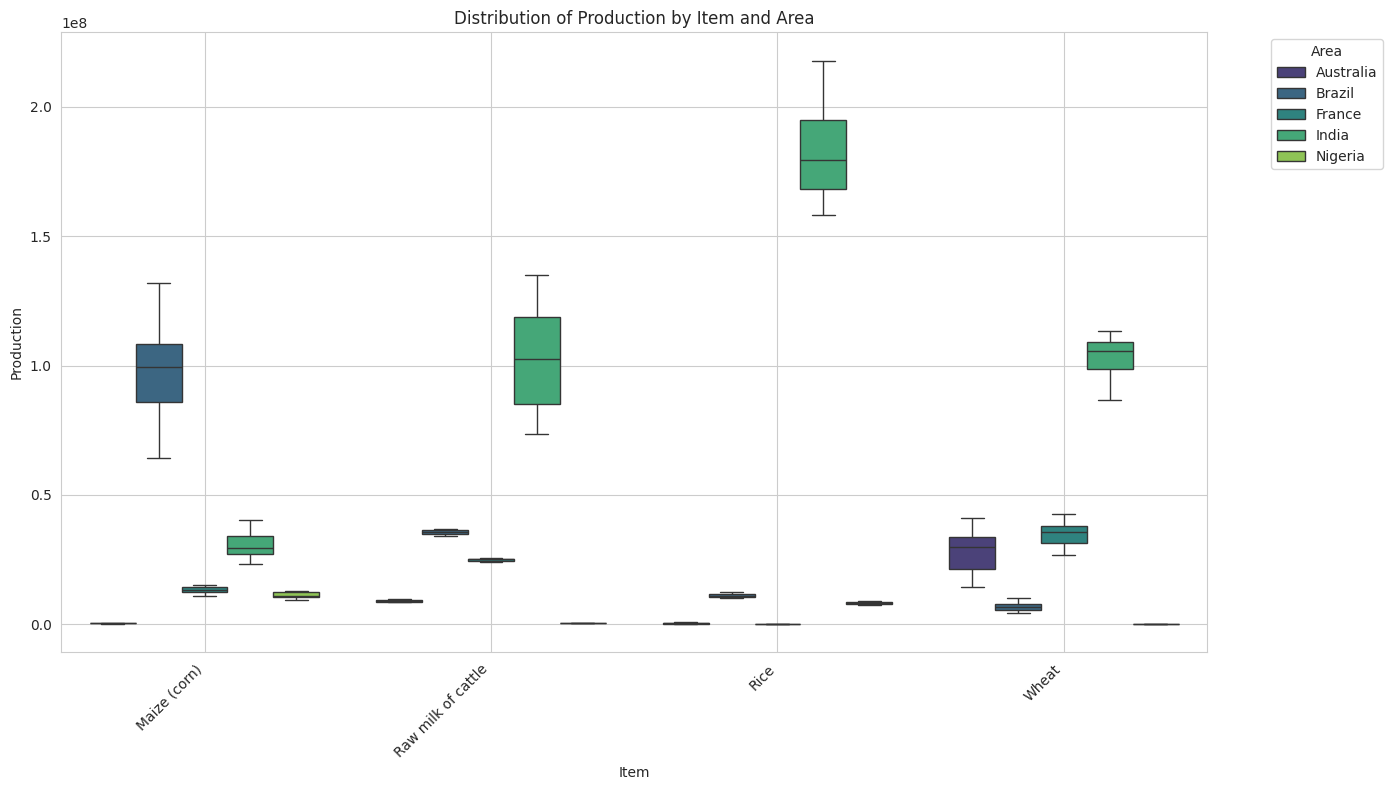

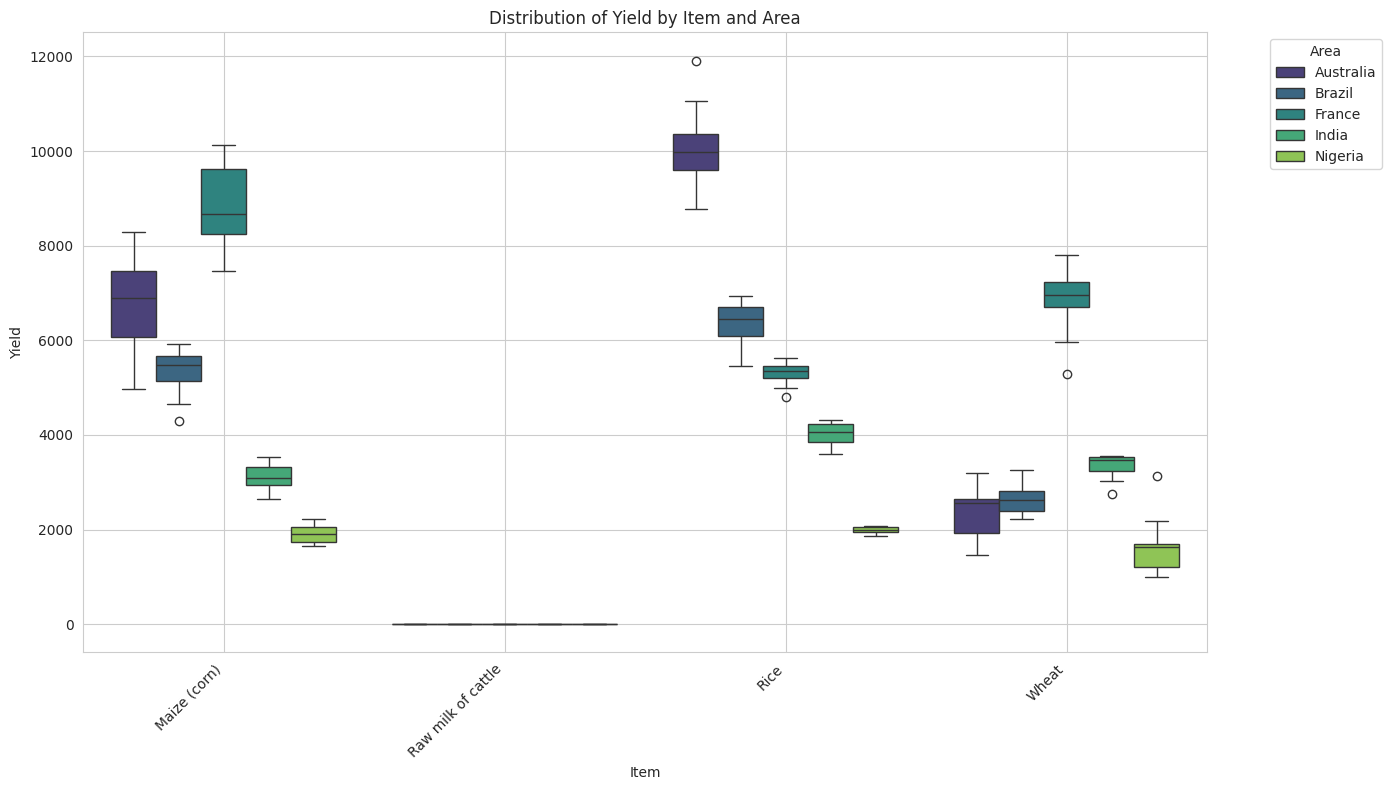

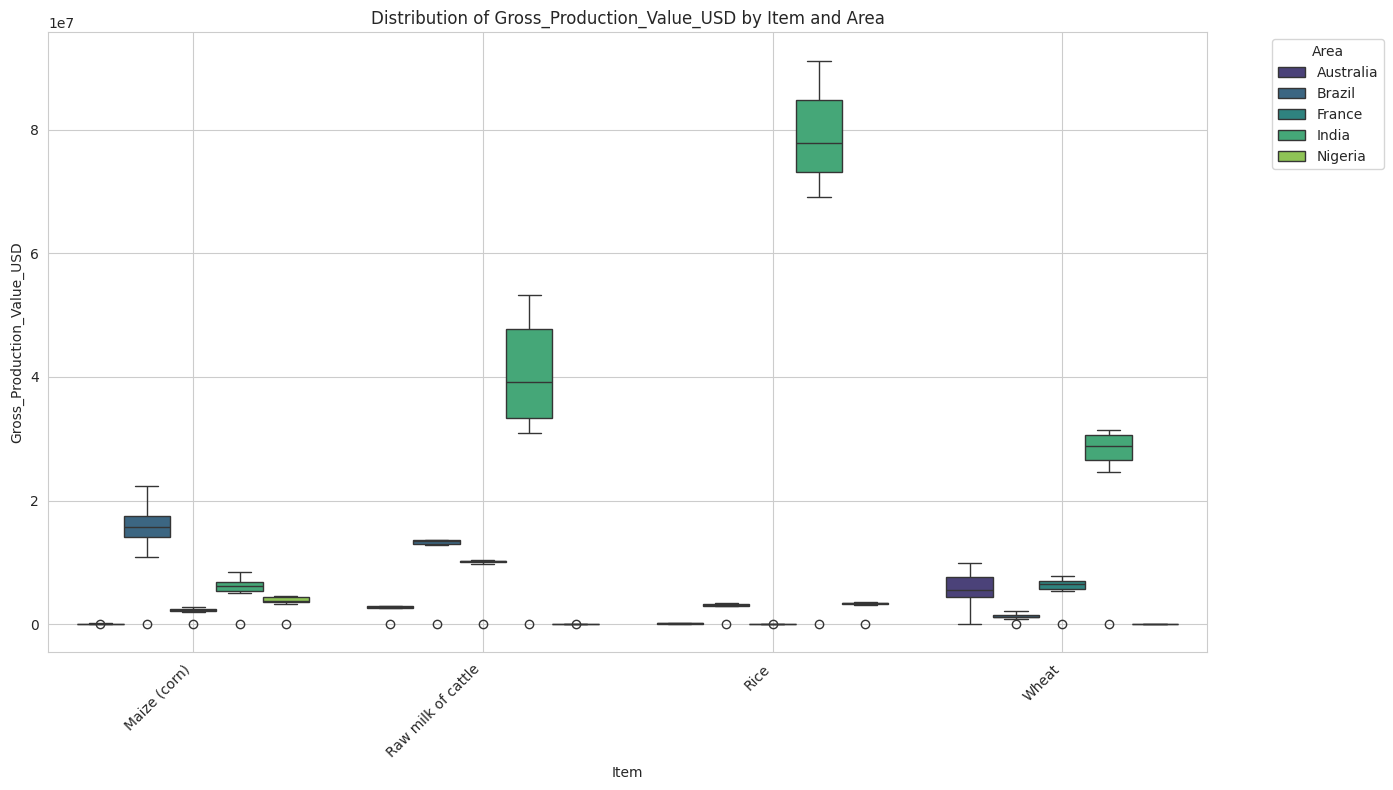

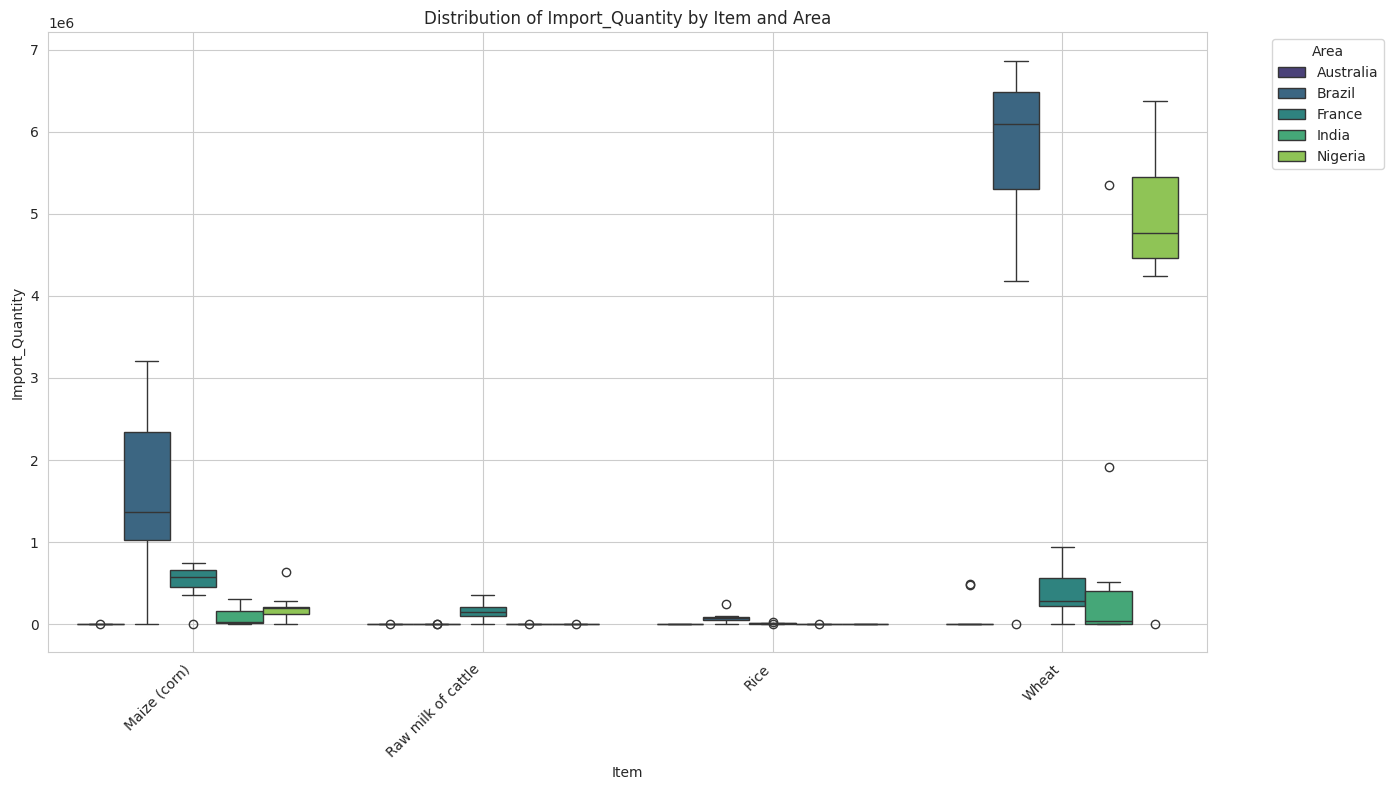

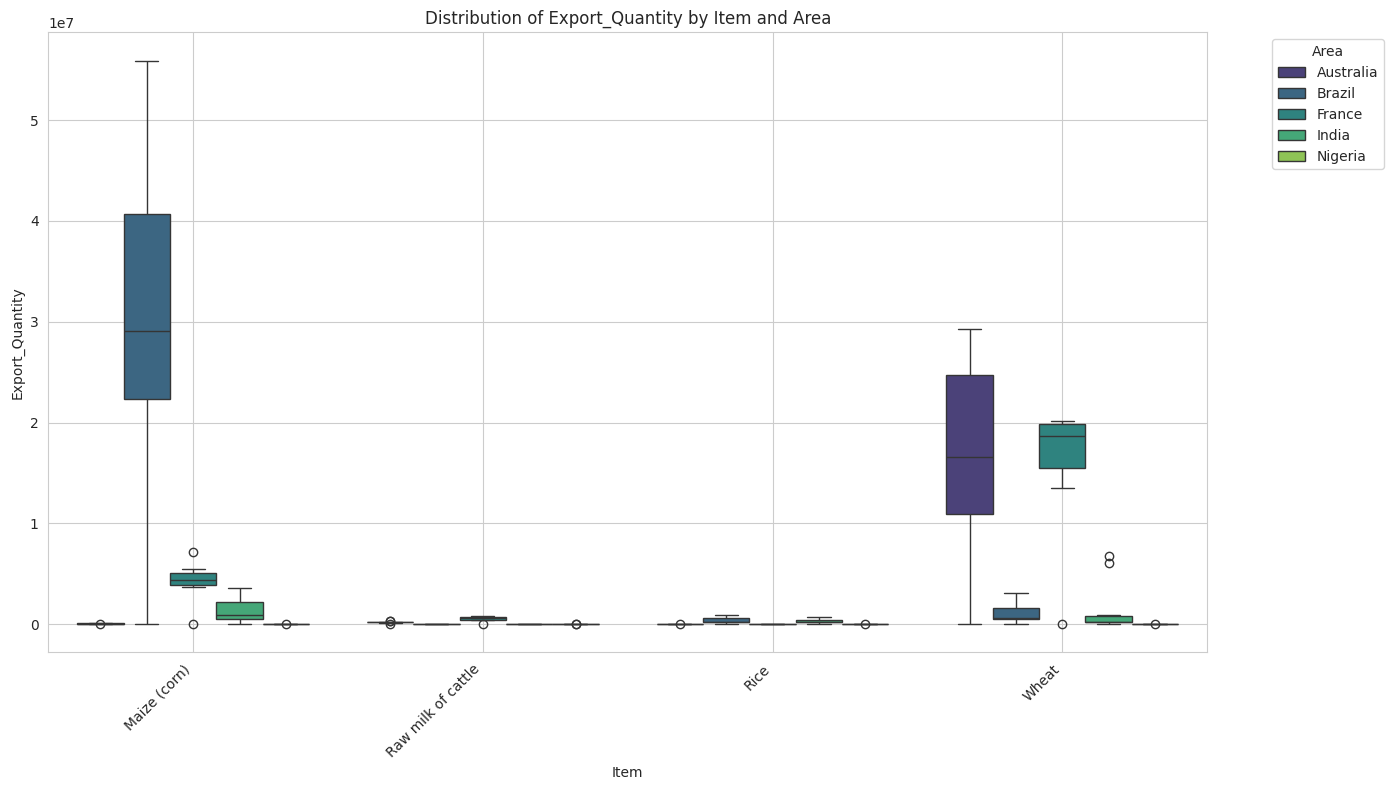

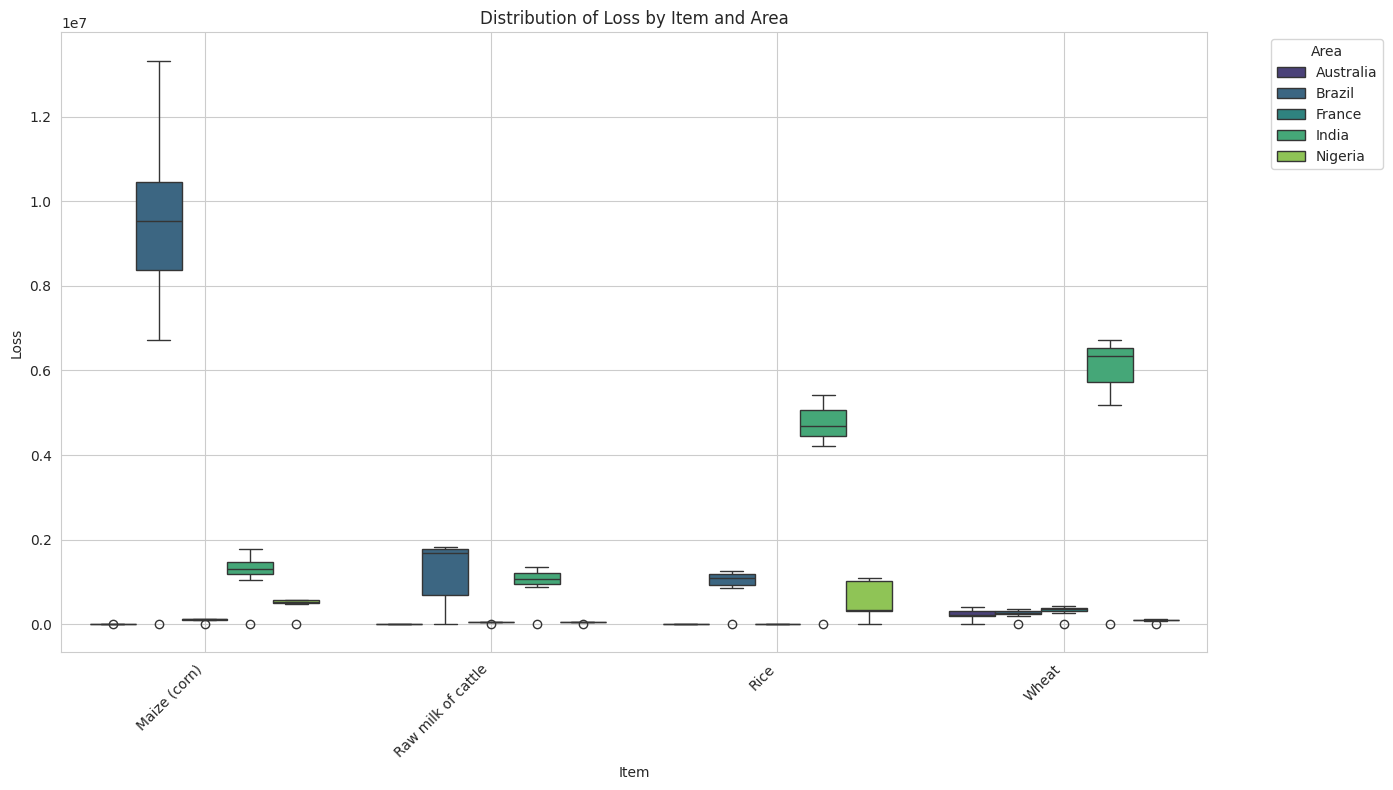

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Production', 'Yield', 'Gross_Production_Value_USD', 'Import_Quantity', 'Export_Quantity', 'Loss']


sns.set_style('whitegrid')


for col in numerical_cols:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='Item', y=col, hue='Area', palette='viridis')
    plt.title(f'Distribution of {col} by Item and Area')
    plt.xlabel('Item')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['number'])


correlation_matrix = numerical_df.corr()


print("Correlation Matrix:")
print(correlation_matrix.head())

Correlation Matrix:
                    Year  Production     Yield  Area_Harvested  Yield_Carcass  \
Year            1.000000    0.071953  0.031775        0.024108       0.022362   
Production      0.071953    1.000000 -0.067999        0.844670      -0.060381   
Yield           0.031775   -0.067999  1.000000        0.063412      -0.499347   
Area_Harvested  0.024108    0.844670  0.063412        1.000000      -0.252393   
Yield_Carcass   0.022362   -0.060381 -0.499347       -0.252393       1.000000   

                Gross_Production_Index  Per_Capita_Production_Index  \
Year                         -0.333339                    -0.394965   
Production                    0.202332                     0.210749   
Yield                        -0.124584                    -0.104276   
Area_Harvested                0.134461                     0.135634   
Yield_Carcass                -0.030172                    -0.017923   

                Gross_Production_Value_USD  Food_Quantity  \
Year 

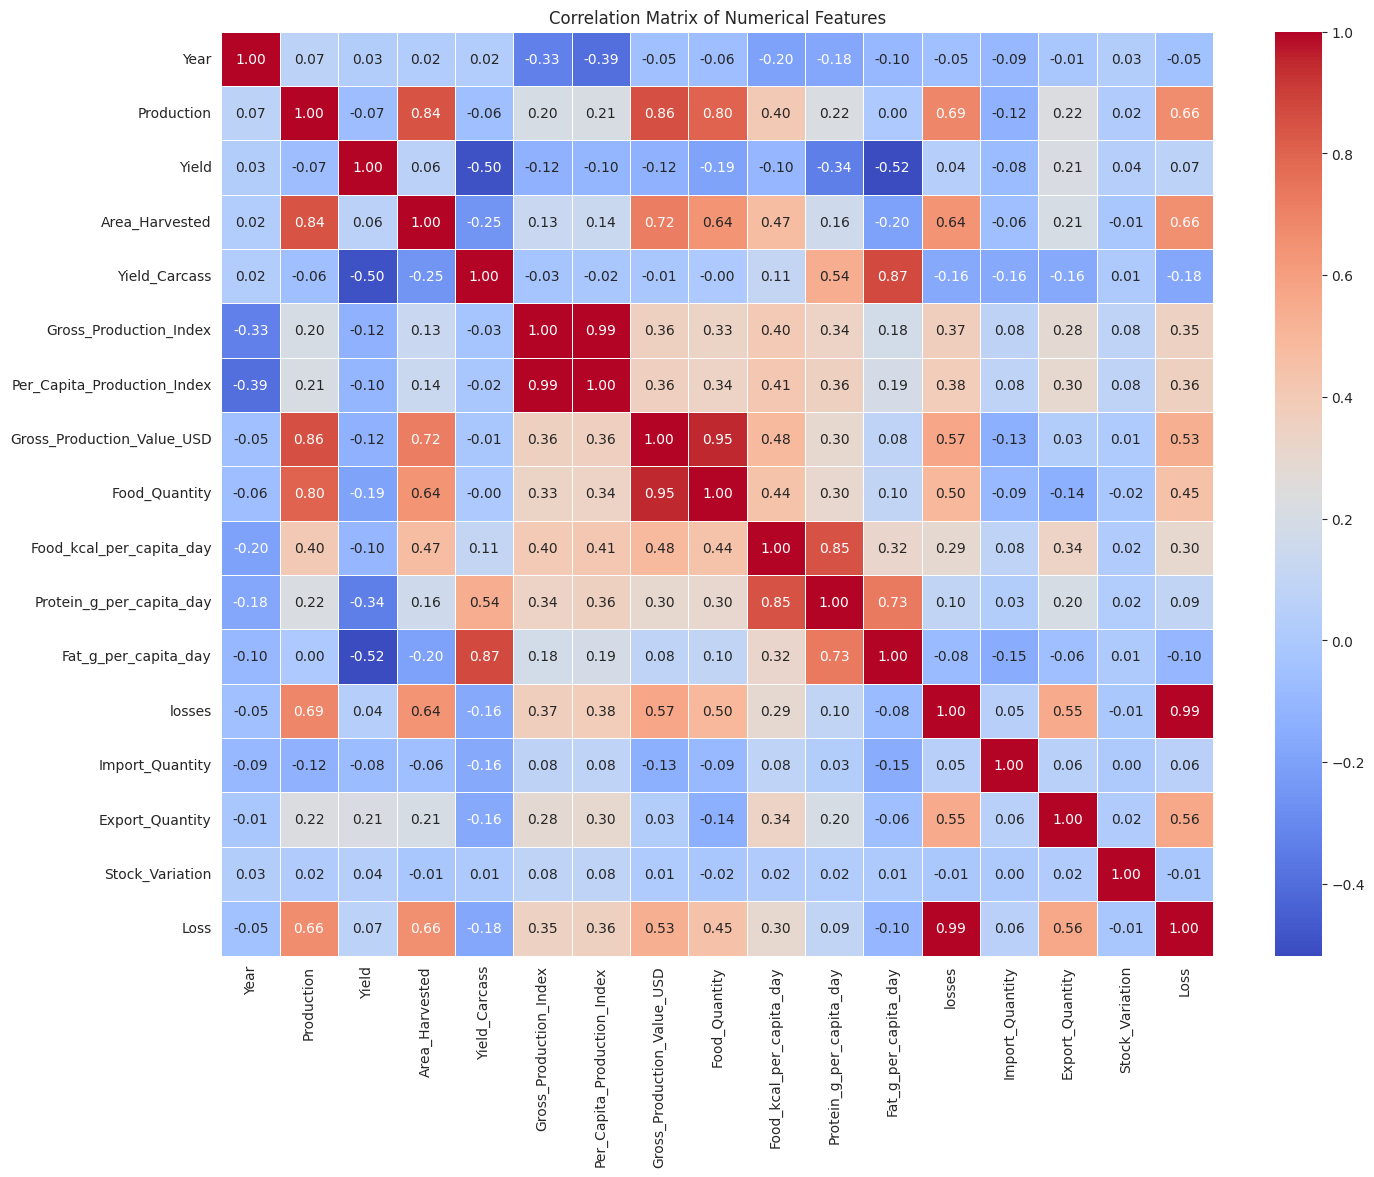

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Area                           0
Item                           0
Year                           0
Production                     0
Yield                          0
Area_Harvested                 0
Yield_Carcass                  0
Gross_Production_Index         0
Per_Capita_Production_Index    0
Gross_Production_Value_USD     0
Food_Quantity                  0
Food_kcal_per_capita_day       0
Protein_g_per_capita_day       0
Fat_g_per_capita_day           0
losses                         0
Import_Quantity                0
Export_Quantity                0
Stock_Variation                0
Loss                           0
dtype: int64


In [9]:
import pandas as pd


categorical_cols = ['Area', 'Item']


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
print(df_encoded.head())
print("\nShape of DataFrame after encoding:", df_encoded.shape)

DataFrame after one-hot encoding:
   Year  Production   Yield  Area_Harvested  Yield_Carcass  \
0  2015   494589.00  8300.1           59588              0   
1  2016   400032.00  7508.0           53281              0   
2  2017   436193.91  6436.3           67771              0   
3  2018   387240.00  7336.5           52783              0   
4  2019   327206.19  5550.7           58949              0   

   Gross_Production_Index  Per_Capita_Production_Index  \
0                   115.5                        115.5   
1                    93.4                         92.0   
2                   101.8                         98.7   
3                    90.4                         86.2   
4                    76.4                         71.8   

   Gross_Production_Value_USD  Food_Quantity  Food_kcal_per_capita_day  ...  \
0                      124963            102                      40.9  ...   
1                      101072            100                      39.1  ...   
2      

In [10]:
import numpy as np


target_variable = 'Production'
y = df_encoded[target_variable]

X = df_encoded.drop(columns=[target_variable, 'Year'])

for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

print(f"Target variable chosen: {target_variable}")
print('\nFirst 5 rows of features (X):')
print(X.head())
print('\nFirst 5 rows of target variable (y):')
print(y.head())
print('\nShape of X:', X.shape)
print('Shape of y:', y.shape)

Target variable chosen: Production

First 5 rows of features (X):
    Yield  Area_Harvested  Yield_Carcass  Gross_Production_Index  \
0  8300.1           59588              0                   115.5   
1  7508.0           53281              0                    93.4   
2  6436.3           67771              0                   101.8   
3  7336.5           52783              0                    90.4   
4  5550.7           58949              0                    76.4   

   Per_Capita_Production_Index  Gross_Production_Value_USD  Food_Quantity  \
0                        115.5                      124963            102   
1                         92.0                      101072            100   
2                         98.7                      110209            103   
3                         86.2                       97840            100   
4                         71.8                       82672             93   

   Food_kcal_per_capita_day  Protein_g_per_capita_day  Fat_g_p

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Required libraries imported successfully.")

Required libraries imported successfully.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (160, 22)
Shape of X_test: (40, 22)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [13]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RandomForestRegressor model initialized, trained, and predictions made.")

RandomForestRegressor model initialized, trained, and predictions made.


In [14]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

R-squared: 0.99
Mean Squared Error (MSE): 12532894471195.47
Mean Absolute Error (MAE): 1700842.85


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


feature_importances = model.feature_importances_


features_df = pd.Series(feature_importances, index=X.columns)


sorted_features = features_df.sort_values(ascending=False)

print("Top 10 most important features:")
print(sorted_features.head(10))

Top 10 most important features:
Area_Harvested                0.476586
Gross_Production_Value_USD    0.283752
losses                        0.097014
Area_India                    0.050323
Item_Rice                     0.027255
Food_Quantity                 0.012970
Yield_Carcass                 0.012298
Yield                         0.007725
Food_kcal_per_capita_day      0.006212
Fat_g_per_capita_day          0.003960
dtype: float64


/tmp/ipython-input-2418461197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_features.head(10).index, y=sorted_features.head(10).values, palette='viridis')


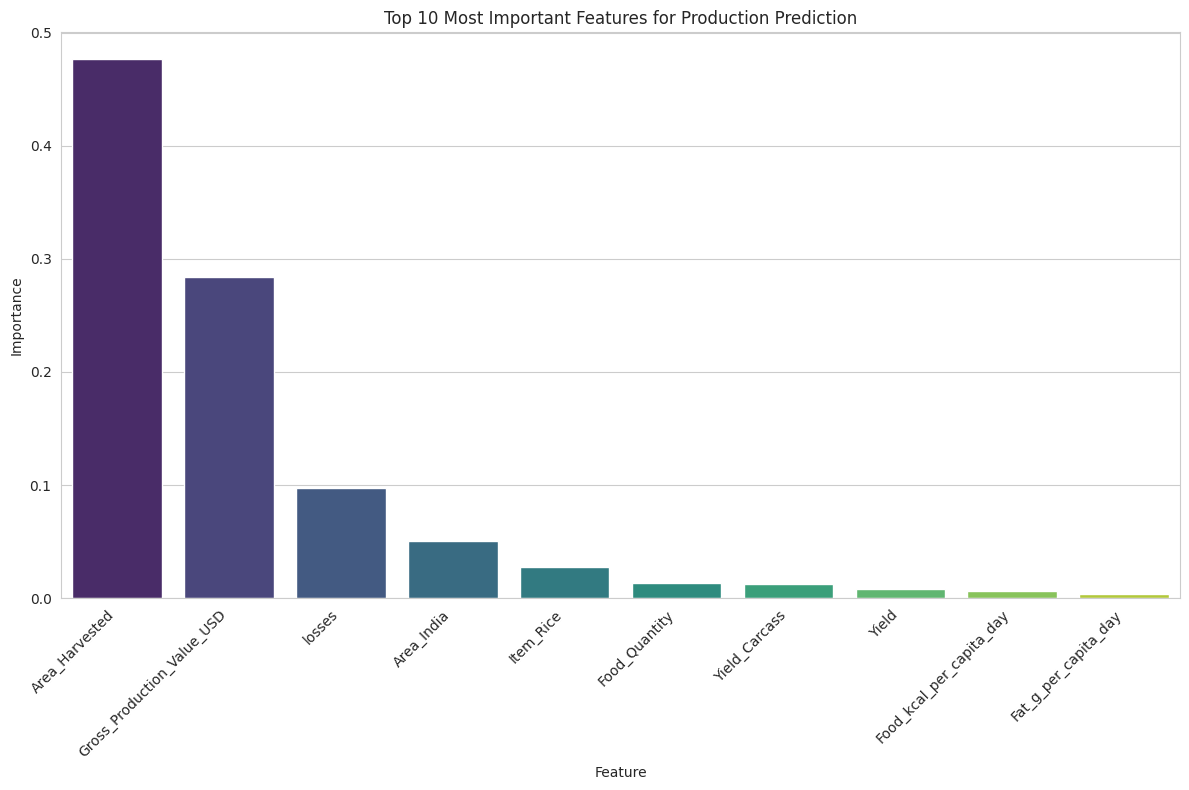

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features.head(10).index, y=sorted_features.head(10).values, palette='viridis')
plt.title('Top 10 Most Important Features for Production Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

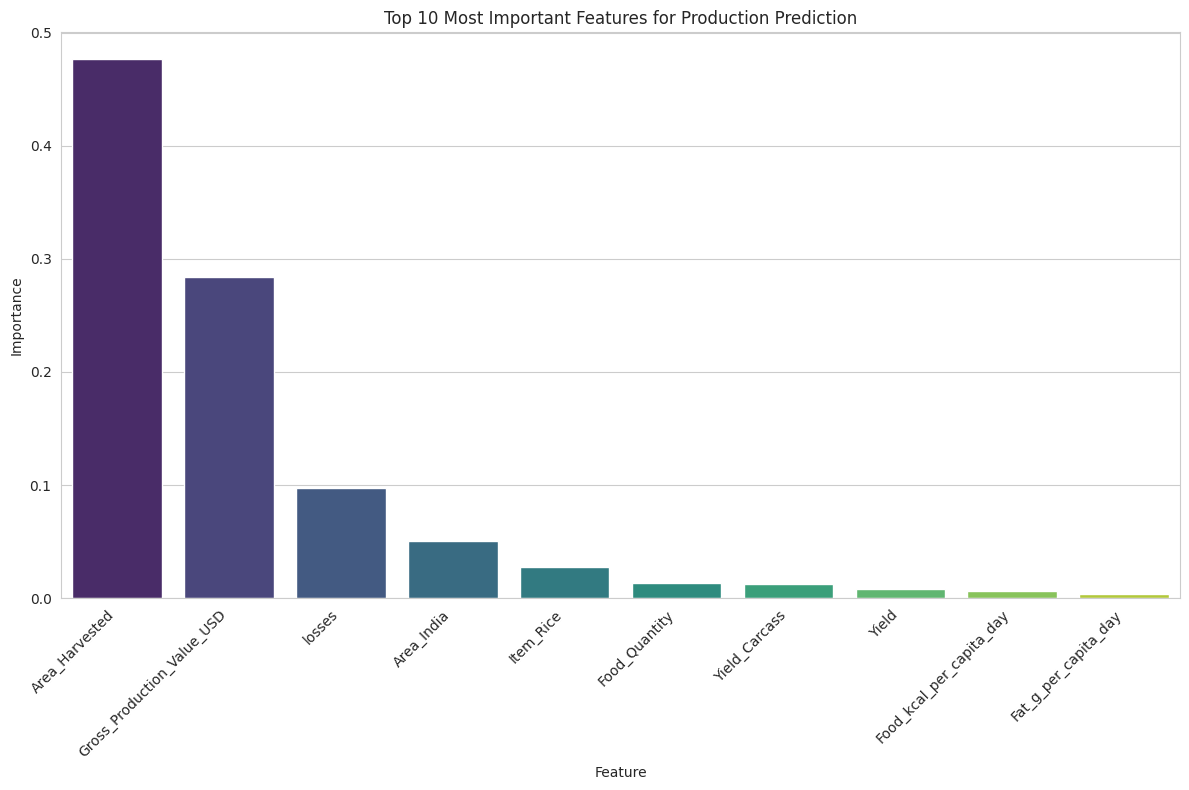

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features.head(10).index, y=sorted_features.head(10).values, hue=sorted_features.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Most Important Features for Production Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Interpretation of Feature Importances and Actionable Insights

From the feature importance plot, we can observe the following most influential factors for predicting 'Production':

1.  **Area_Harvested (Importance: ~0.477)**: This is by far the most significant feature. A larger `Area_Harvested` directly correlates with higher production, which is intuitive. This suggests that expanding the cultivated land area is a primary driver for increasing overall production.
    *   **Actionable Insight**: Prioritize initiatives that support increasing the area under cultivation, such as land availability, improved land management, and sustainable expansion practices.

2.  **Gross_Production_Value_USD (Importance: ~0.284)**: This indicates the monetary value of the production. High production value suggests either high production volume or high market prices. Since this is highly correlated with `Production`, it likely reflects the volume.
    *   **Actionable Insight**: Invest in market analysis and price stabilization strategies to ensure that increased production translates into higher economic returns for producers. Promoting value-added products could also increase this metric.

3.  **losses (Importance: ~0.097)**: This feature, representing post-harvest losses or other types of production losses, has a significant negative impact (as higher losses reduce net production). Reducing losses would directly increase available production.
    *   **Actionable Insight**: Implement robust post-harvest management techniques, improve storage facilities, and invest in pest and disease control measures to minimize losses across the supply chain.

4.  **Area_India (Importance: ~0.050)**: The 'Area_India' categorical variable being highly important suggests that India, as a specific geographical area, has a unique and significant contribution or characteristic regarding production within this dataset. It implies that India's production dynamics are distinct and influential.
    *   **Actionable Insight**: Conduct a deeper, country- specific analysis for India to understand the underlying factors contributing to its high importance. Share best practices and technologies from India to other regions with similar conditions.

5.  **Item_Rice (Importance: ~0.027)**: Similar to `Area_India`, 'Item_Rice' being important highlights the significant role of rice production in the overall `Production` dynamics of the dataset.
    *   **Actionable Insight**: Focus on optimizing rice cultivation practices, research and development for high-yield rice varieties, and efficient water management tailored for rice-producing regions.

**Overall Recommendations:**

*   **Focus on Land Optimization and Expansion**: Given `Area_Harvested`'s dominance, policies and investments should aim at sustainable land expansion and optimizing yield from existing agricultural lands.
*   **Value Chain Enhancement**: Efforts to reduce `losses` and increase `Gross_Production_Value_USD` should be integrated throughout the production and supply chain, from farming to market.
*   **Targeted Regional and Crop-Specific Strategies**: Acknowledge the significant impact of specific regions (like India) and specific crops (like Rice) and develop tailored strategies for them to maximize their contribution to overall production.

### Interpretation of Feature Importances and Actionable Insights

From the feature importance plot, we can observe the following most influential factors for predicting 'Production':

1.  **Area_Harvested (Importance: ~0.477)**: This is by far the most significant feature. A larger `Area_Harvested` directly correlates with higher production, which is intuitive. This suggests that expanding the cultivated land area is a primary driver for increasing overall production.
    *   **Actionable Insight**: Prioritize initiatives that support increasing the area under cultivation, such as land availability, improved land management, and sustainable expansion practices.

2.  **Gross_Production_Value_USD (Importance: ~0.284)**: This indicates the monetary value of the production. High production value suggests either high production volume or high market prices. Since this is highly correlated with `Production`, it likely reflects the volume.
    *   **Actionable Insight**: Invest in market analysis and price stabilization strategies to ensure that increased production translates into higher economic returns for producers. Promoting value-added products could also increase this metric.

3.  **losses (Importance: ~0.097)**: This feature, representing post-harvest losses or other types of production losses, has a significant negative impact (as higher losses reduce net production). Reducing losses would directly increase available production.
    *   **Actionable Insight**: Implement robust post-harvest management techniques, improve storage facilities, and invest in pest and disease control measures to minimize losses across the supply chain.

4.  **Area_India (Importance: ~0.050)**: The 'Area_India' categorical variable being highly important suggests that India, as a specific geographical area, has a unique and significant contribution or characteristic regarding production within this dataset. It implies that India's production dynamics are distinct and influential.
    *   **Actionable Insight**: Conduct a deeper, country- specific analysis for India to understand the underlying factors contributing to its high importance. Share best practices and technologies from India to other regions with similar conditions.

5.  **Item_Rice (Importance: ~0.027)**: Similar to `Area_India`, 'Item_Rice' being important highlights the significant role of rice production in the overall `Production` dynamics of the dataset.
    *   **Actionable Insight**: Focus on optimizing rice cultivation practices, research and development for high-yield rice varieties, and efficient water management tailored for rice-producing regions.

**Overall Recommendations:**

*   **Focus on Land Optimization and Expansion**: Given `Area_Harvested`'s dominance, policies and investments should aim at sustainable land expansion and optimizing yield from existing agricultural lands.
*   **Value Chain Enhancement**: Efforts to reduce `losses` and increase `Gross_Production_Value_USD` should be integrated throughout the production and supply chain, from farming to market.
*   **Targeted Regional and Crop-Specific Strategies**: Acknowledge the significant impact of specific regions (like India) and specific crops (like Rice) and develop tailored strategies for them to maximize their contribution to overall production.


## Final Task

### Subtask:
Summarize the key findings from the diagnostic analysis, the predictions from the predictive analysis, and the recommendations from the prescriptive analysis, providing an overall conclusion based on the entire analysis.


## Summary:

### Data Analysis Key Findings

*   The dataset, comprising 200 entries and 19 columns, includes data from 5 unique areas (Australia, Brazil, France, India, Nigeria) and 4 specific items (Maize (corn), Raw milk of cattle, Rice, Wheat) spanning the years 2015-2024. Notably, no missing values were identified, ensuring data completeness.
*   Diagnostic analysis revealed diverse trends in `Production`, `Yield`, `Gross_Production_Value_USD`, `Import_Quantity`, `Export_Quantity`, and `Loss` across different areas and items over the observed period.
*   A predictive model, a Random Forest Regressor, was successfully trained to forecast `Production`, achieving a high R-squared score of 0.99, indicating a strong ability to explain the variance in the target variable. The Mean Absolute Error (MAE) was approximately 1,700,842.85.
*   Feature importance analysis from the predictive model highlighted `Area_Harvested` as the most crucial factor, with an importance score of approximately 0.477. Other significant predictors included `Gross_Production_Value_USD` (importance: ~0.284) and `losses` (importance: ~0.097).
*   Specific regional and commodity factors also demonstrated considerable influence, with `Area_India` (importance: ~0.050) and `Item_Rice` (importance: ~0.027) being among the top five most important features for `Production` prediction.

### Insights or Next Steps

*   **Prioritize Land Optimization and Loss Reduction**: Focus on initiatives for sustainable land expansion and improved land management, given `Area_Harvested`'s dominant influence. Simultaneously, implement robust post-harvest management and pest/disease control to significantly reduce `losses`, thereby directly increasing net production.
*   **Enhance Value Chains with Targeted Strategies**: Invest in market analysis and price stabilization to ensure increased `Gross_Production_Value_USD` translates into higher economic returns. Develop tailored regional strategies for areas like India and crop-specific interventions for items like Rice to capitalize on their unique and significant contributions to overall production.
